In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from fbprophet import Prophet 
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation

In [135]:
#Lendo e transformando o arquivo CSV em um objeto pandas DataFrame nomeado de "df"
train = pd.read_csv('C:/Users/juan_/Documents/GitHub/Datasets/df.csv')
teste = pd.read_csv('C:/Users/juan_/Documents/GitHub/Datasets/teste.csv')

In [136]:
#Verificando o head e tail do CSV
train.drop(columns=['Unnamed: 0','Date','Test'],inplace=True)

In [137]:
teste.drop(columns=['Unnamed: 0','Date','Test'],inplace=True)

In [140]:
train['Teste'] = pd.to_datetime(train['Teste'])
train

,Product_Code,Order_Demand,Month,Year,Teste
0,Product_0965,2,1,2011,2011-01-01
1,Product_0412,2,10,2011,2011-10-01
2,Product_0125,2,10,2011,2011-10-01
3,Product_0642,3,10,2011,2011-10-01
4,Product_2137,25,11,2011,2011-11-01
...,...,...,...,...,...
1006495,Product_1833,15000,7,2016,2016-07-01
1006496,Product_0627,50,7,2016,2016-07-01
1006497,Product_1107,1000,7,2016,2016-07-01
1006498,Product_0033,5000,7,2016,2016-07-01


In [141]:
df = train[(train['Product_Code']=='Product_1359')]
df

,Product_Code,Order_Demand,Month,Year,Teste
668,Product_1359,75000,1,2012,2012-01-01
669,Product_1359,5000,1,2012,2012-01-01
716,Product_1359,200000,1,2012,2012-01-01
724,Product_1359,50000,1,2012,2012-01-01
748,Product_1359,10000,1,2012,2012-01-01
...,...,...,...,...,...
1006284,Product_1359,10000,7,2016,2016-07-01
1006338,Product_1359,10000,7,2016,2016-07-01
1006366,Product_1359,75000,7,2016,2016-07-01
1006456,Product_1359,50000,7,2016,2016-07-01


In [142]:
df = df.groupby(by=['Teste']).sum()
df.drop(columns=['Month','Year'],inplace=True)

In [143]:
df

,Order_Demand
Teste,
2012-01-01,8911000
2012-02-01,8131000
2012-03-01,7775000
2012-04-01,8960000
2012-05-01,8475000
2012-06-01,6556000
2012-07-01,7422000
2012-08-01,6667000
2012-09-01,8349000


In [124]:
df.reset_index(inplace=True)
df['Teste'] = pd.to_datetime(df['Teste'])
df

,Teste,Order_Demand
0,2012-01-01,8911000
1,2012-10-01,7685000
2,2012-11-01,7894000
3,2012-12-01,8302000
4,2012-02-01,8131000
5,2012-03-01,7775000
6,2012-04-01,8960000
7,2012-05-01,8475000
8,2012-06-01,6556000
9,2012-07-01,7422000


In [125]:
df['ds'] = df['Teste']
df['y'] = df['Order_Demand']
df.drop(columns=['Order_Demand','Teste'],inplace=True)

In [126]:
df.head(60)

,ds,y
0,2012-01-01,8911000
1,2012-10-01,7685000
2,2012-11-01,7894000
3,2012-12-01,8302000
4,2012-02-01,8131000
5,2012-03-01,7775000
6,2012-04-01,8960000
7,2012-05-01,8475000
8,2012-06-01,6556000
9,2012-07-01,7422000


In [127]:
m=Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [131]:
future = m.make_future_dataframe(periods=1 , freq='M') 

In [132]:
forecast = m.predict(future) 

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
54,2016-07-01,7.191241e+06,6.180009e+06,8.277056e+06,7.331579e+06,7.331579e+06,7.331579e+06
55,2016-10-01,7.712505e+06,6.669010e+06,8.799454e+06,7.276634e+06,7.276634e+06,7.276634e+06
56,2016-11-01,8.309772e+06,7.282611e+06,9.317913e+06,7.258120e+06,7.258120e+06,7.258120e+06
57,2016-12-01,6.655608e+06,5.614616e+06,7.676402e+06,7.240203e+06,7.240203e+06,7.240203e+06
58,2016-12-31,7.945285e+06,6.809670e+06,9.016052e+06,7.222286e+06,7.222284e+06,7.222287e+06


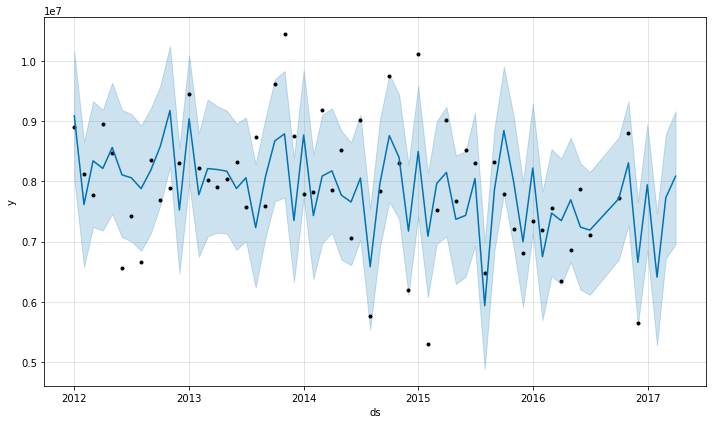

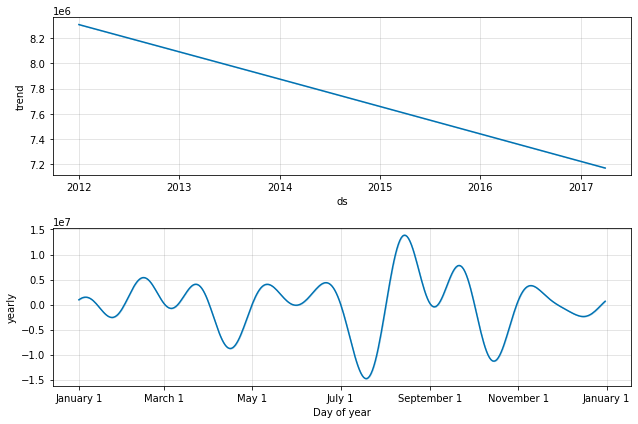

In [130]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

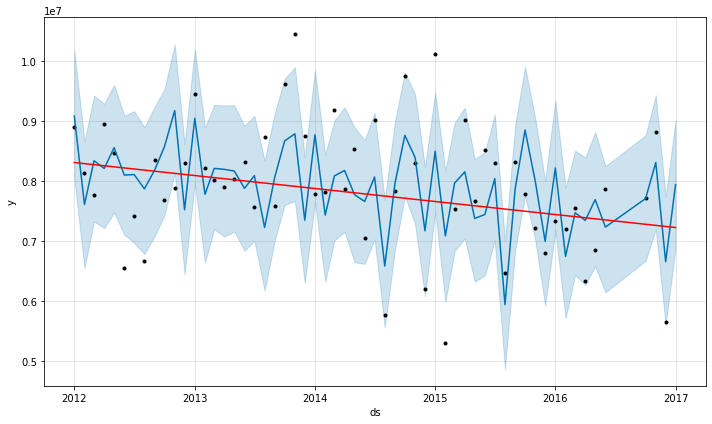

In [26]:
fig = m.plot(forecast) 

a = add_changepoints_to_plot(fig.gca(), m, forecast)

KeyError: 'Date'

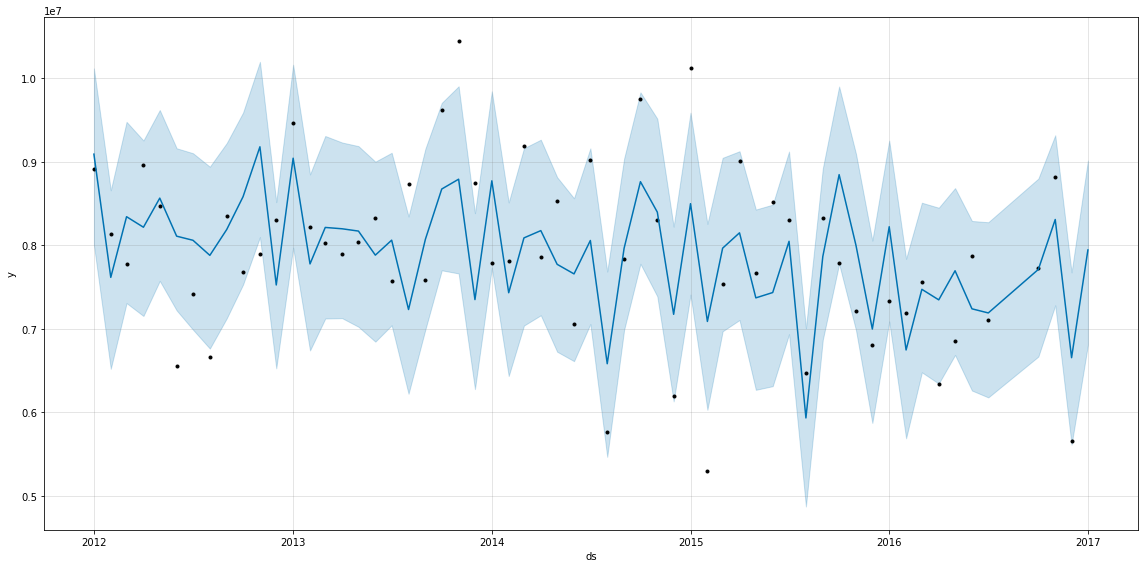

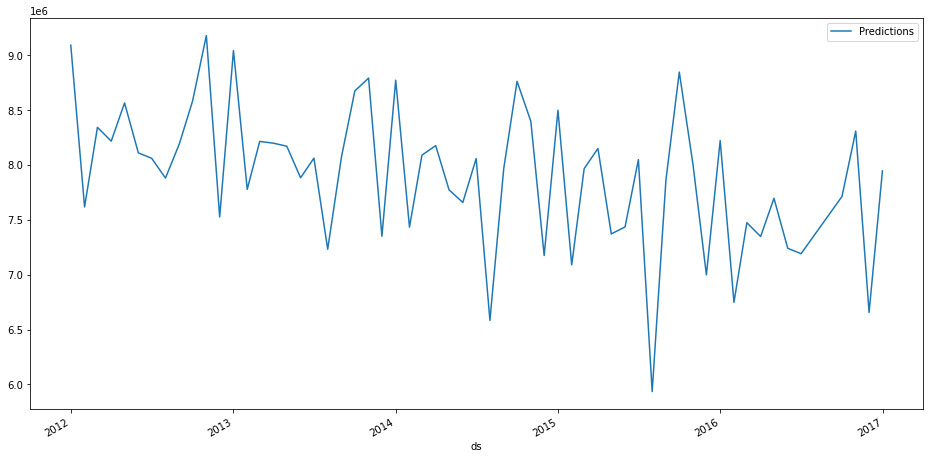

In [134]:
m.plot(forecast,figsize=(16,8))
ax=forecast.plot(x='ds',y='yhat',legend=True,label='Predictions',figsize=(16,8))
teste.plot(x='Date',y='Order_Demand',legend=True,label='True Test Data',ax=ax)